# Model training with +ve Xeff

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [2]:
outdir = "out_positive_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_positive_xeff.pkl")

In [3]:
data

,q,xeff,a1,p_a1
0,0.1,0.1,"[0.012024048096192383, 0.014003959823454523, 0...","[0.009216418726310445, 0.028458441503637077, 0..."
1,0.1,0.2,"[0.1222444889779559, 0.12400351805816039, 0.12...","[0.0013008215791223796, 0.004041149522956928, ..."
2,0.1,0.3,"[0.23246492985971942, 0.23400307629286626, 0.2...","[0.0010697856954987733, 0.0024382824268816272,..."
3,0.1,0.4,"[0.3426853707414829, 0.3440026345275721, 0.345...","[0.0009629691381983512, 0.00222891654232283, 0..."
4,0.1,0.5,"[0.45290581162324645, 0.454002192762278, 0.455...","[0.001315515963205737, 0.0027549382395791115, ..."
...,...,...,...,...
85,1.0,0.5,"[0.002004008016032064, 0.004003999983935807, 0...","[0.004842086019793161, 0.00951858515585301, 0...."
86,1.0,0.6,"[0.20240480961923846, 0.2040031967743101, 0.20...","[0.0010434286955042496, 0.0013208399318507351,..."
87,1.0,0.7,"[0.40280561122244485, 0.4040023935646844, 0.40...","[0.0018007422164230593, 0.0023384387900644075,..."
88,1.0,0.8,"[0.6032064128256512, 0.6040015903550587, 0.604...","[0.0032252396366210193, 0.004504994041532742, ..."


## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [4]:
# data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)
# data.reset_index(drop=True, inplace=True)

### Stupid way of getting everything to  numpy arrays with dtyoe = float64

In [5]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

### Consider Normalizing p

In [7]:
# from sklearn.preprocessing import MinMaxScaler
# scaler_a = MinMaxScaler()
# a1 = scaler_a.fit_transform(a1)
# scaler_p = MinMaxScaler()
# p = scaler_p.fit_transform(p)

### Spliting data into train and test

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

### Pair q and xeff

In [9]:
train_q_xeff = np.stack((train_q, train_xeff), axis=1)

In [24]:
# a1
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
# p
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
# q
q = []
for i in data['q'].values:
    for j in range(len(a1[0])):
        q.append(i)
q = np.array(q)
# xeff 
xeff = []
for i in data['xeff'].values:
    for j in range(len(a1[0])):
        xeff.append(i)
xeff = np.array(xeff)

In [26]:
a1 = a1.flatten()
p = p.flatten()

In [27]:
print(xeff.shape, q.shape, p.shape, a1.shape)

(45000,) (45000,) (45000,) (45000,)


Nice

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

## Define evoluation function

In [10]:
def eva_model(model):
    # evaluate the model
    global test_a1
    global test_p
    global test_q_xeff
    scores = model.evaluate([test_q_xeff, test_a1], test_p)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    # plot history
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    #
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoches')
    plt.ylabel('loss')
    plt.title('model loss')
    plt.show()
    #
    test_p_pred = model.predict([test_q_xeff, test_a1])
    # test_p_pred = scaler_p.inverse_transform(test_p_pred)
    # test_p = scaler_p.inverse_transform(test_p)
    # test_a1 = scaler_a.inverse_transform(test_a1)
    plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
    plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
    plt.title(f'prediction vs true p_a1 for q = {test_q[3]}, xeff = {test_xeff[3]}')
    plt.legend()
    plt.xlabel('a1')
    plt.ylabel('p')
    plt.show()

    plt.plot(test_a1[8],test_p_pred[8],label = 'pred',color = 'red')
    plt.plot(test_a1[8],test_p[8],label = 'true',color = 'blue')
    plt.title(f'prediction vs true p_a1 for q = {test_q[5]}, xeff = {test_xeff[5]}')
    plt.legend()
    plt.xlabel('a1')
    plt.ylabel('p')
    plt.show()

## Define Model

In [12]:
Input1 = keras.Input(shape=(1,)) # q
Input2 = keras.Input(shape=(1,)) # xeff
Input3 = keras.Input(shape=(1,)) # a1
merged = keras.layers.concatenate([Input1, Input2,Input3]) # Merging Laryer
# 
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
#
output = keras.layers.Dense(500,activation='relu')(x) # Output
#
model = Model(inputs=[Input1,Input2], outputs=output)
#
# opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= 'adam',
                loss='mse',
                metrics= ['accuracy'])
#
history = model.fit([,train_a1], train_p, validation_split=0.2,
                    epochs=5000, batch_size=32, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 1s - loss: 14.4137 - accuracy: 0.0000e+00 - val_loss: 7.4602 - val_accuracy: 0.0000e+00 - 1s/epoch - 144ms/step
Epoch 2/500
8/8 - 0s - loss: 13.6810 - accuracy: 0.0000e+00 - val_loss: 6.6214 - val_accuracy: 0.0000e+00 - 73ms/epoch - 9ms/step
Epoch 3/500
8/8 - 0s - loss: 12.8702 - accuracy: 0.0000e+00 - val_loss: 5.4466 - val_accuracy: 0.0000e+00 - 59ms/epoch - 7ms/step
Epoch 4/500
8/8 - 0s - loss: 11.6317 - accuracy: 0.0175 - val_loss: 4.9547 - val_accuracy: 0.0000e+00 - 66ms/epoch - 8ms/step
Epoch 5/500
8/8 - 0s - loss: 10.0228 - accuracy: 0.0000e+00 - val_loss: 3.3492 - val_accuracy: 0.0000e+00 - 46ms/epoch - 6ms/step
Epoch 6/500
8/8 - 0s - loss: 8.2384 - accuracy: 0.0000e+00 - val_loss: 2.6599 - val_accuracy: 0.0000e+00 - 85ms/epoch - 11ms/step
Epoch 7/500
8/8 - 0s - loss: 6.2331 - accuracy: 0.0000e+00 - val_loss: 2.0668 - val_accuracy: 0.0000e+00 - 40ms/epoch - 5ms/step
Epoch 8/500
8/8 - 0s - loss: 5.9388 - accuracy: 0.0000e+00 - val_loss: 1.9877 - val_accuracy: 0

1/1 [==============================] - 0s 27ms/step - loss: 0.8511 - accuracy: 0.2222
accuracy: 22.22%


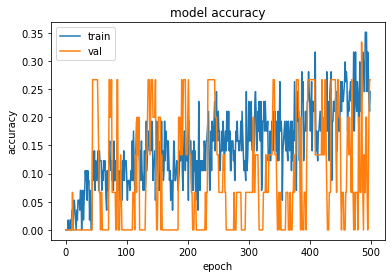

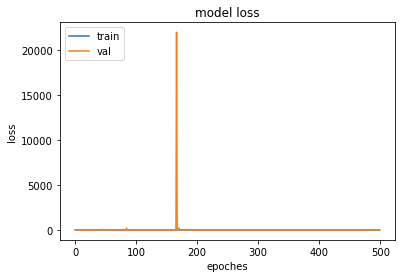

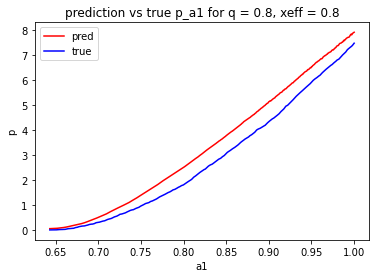

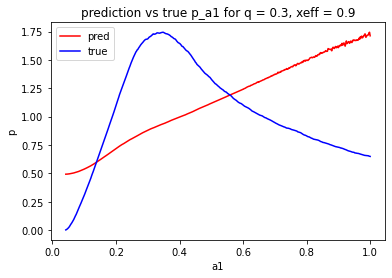

In [19]:
eva_model(model)

In [13]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L2(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) # Output

model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=32, shuffle=True, verbose=2)

Epoch 1/500
2/2 - 1s - loss: 14.9027 - accuracy: 0.0000e+00 - val_loss: 7.8229 - val_accuracy: 0.0000e+00 - 559ms/epoch - 280ms/step
Epoch 2/500
2/2 - 0s - loss: 14.5870 - accuracy: 0.0000e+00 - val_loss: 7.6144 - val_accuracy: 0.0000e+00 - 19ms/epoch - 9ms/step
Epoch 3/500
2/2 - 0s - loss: 14.3419 - accuracy: 0.0000e+00 - val_loss: 7.4955 - val_accuracy: 0.0000e+00 - 20ms/epoch - 10ms/step
Epoch 4/500
2/2 - 0s - loss: 14.0400 - accuracy: 0.0000e+00 - val_loss: 7.2899 - val_accuracy: 0.0000e+00 - 20ms/epoch - 10ms/step
Epoch 5/500
2/2 - 0s - loss: 13.8714 - accuracy: 0.0000e+00 - val_loss: 6.8971 - val_accuracy: 0.0000e+00 - 23ms/epoch - 12ms/step
Epoch 6/500
2/2 - 0s - loss: 13.5319 - accuracy: 0.0000e+00 - val_loss: 6.5513 - val_accuracy: 0.0000e+00 - 21ms/epoch - 11ms/step
Epoch 7/500
2/2 - 0s - loss: 13.1521 - accuracy: 0.0000e+00 - val_loss: 6.4125 - val_accuracy: 0.0000e+00 - 30ms/epoch - 15ms/step
Epoch 8/500
2/2 - 0s - loss: 12.9196 - accuracy: 0.0000e+00 - val_loss: 6.1910 - v

1/1 [==============================] - 0s 28ms/step - loss: 2.4613 - accuracy: 0.2222
accuracy: 22.22%


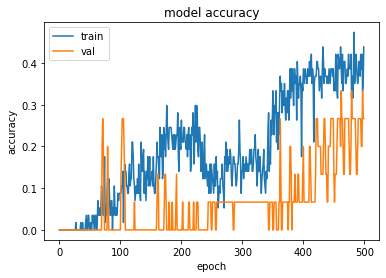

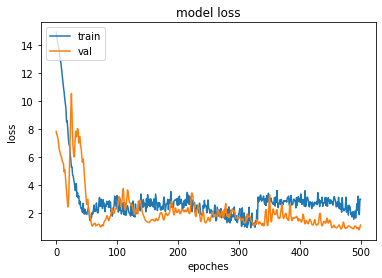

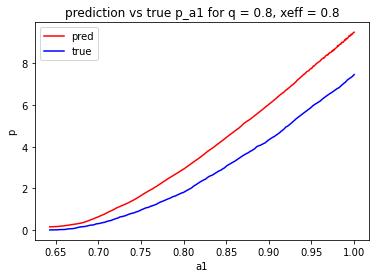

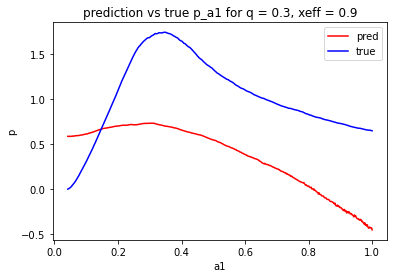

In [14]:
eva_model(model)

Try 2000 epochs L1 regularization

In [15]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(x) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(x) # Fully Connected Layer
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) # Output
model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=2000, batch_size=32, shuffle=True, verbose=2)

Epoch 1/2000
2/2 - 1s - loss: 32.9534 - accuracy: 0.0000e+00 - val_loss: 24.7601 - val_accuracy: 0.0000e+00 - 865ms/epoch - 432ms/step
Epoch 2/2000
2/2 - 0s - loss: 31.3172 - accuracy: 0.0000e+00 - val_loss: 23.2401 - val_accuracy: 0.0000e+00 - 19ms/epoch - 10ms/step
Epoch 3/2000
2/2 - 0s - loss: 29.7845 - accuracy: 0.0000e+00 - val_loss: 21.8126 - val_accuracy: 0.0000e+00 - 23ms/epoch - 12ms/step
Epoch 4/2000
2/2 - 0s - loss: 28.3587 - accuracy: 0.0000e+00 - val_loss: 20.4166 - val_accuracy: 0.0000e+00 - 22ms/epoch - 11ms/step
Epoch 5/2000
2/2 - 0s - loss: 26.9727 - accuracy: 0.0000e+00 - val_loss: 19.3350 - val_accuracy: 0.0000e+00 - 23ms/epoch - 11ms/step
Epoch 6/2000
2/2 - 0s - loss: 25.6116 - accuracy: 0.0000e+00 - val_loss: 18.3418 - val_accuracy: 0.0000e+00 - 25ms/epoch - 12ms/step
Epoch 7/2000
2/2 - 0s - loss: 24.5611 - accuracy: 0.0000e+00 - val_loss: 17.4268 - val_accuracy: 0.0000e+00 - 62ms/epoch - 31ms/step
Epoch 8/2000
2/2 - 0s - loss: 23.0939 - accuracy: 0.0000e+00 - val_

1/1 [==============================] - 0s 27ms/step - loss: 10.6311 - accuracy: 0.2778
accuracy: 27.78%


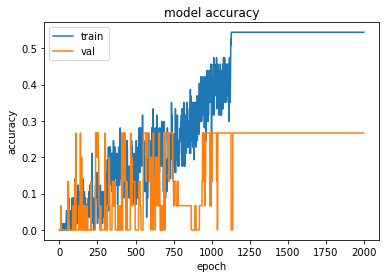

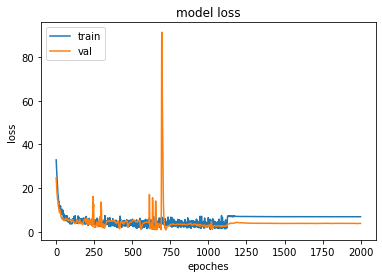

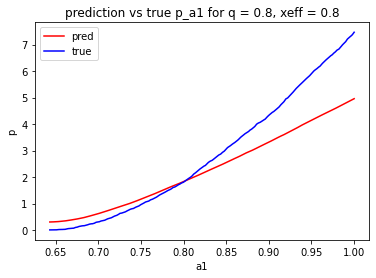

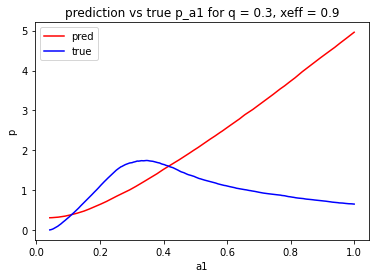

In [16]:
eva_model(model)

converged at ~1200 epoch 

In [17]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(merged) # Dense
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(x) # Dense
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(50, activation='relu',
 kernel_regularizer= keras.regularizers.L1(0.01))(x) # Dense
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500)(x) # Output
model = Model(inputs=[Input1,Input2], outputs=output)

opt = keras.optimizers.Adam(learning_rate = 3e-3)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=1500, batch_size=32, shuffle=True, verbose=2)

Epoch 1/1500
2/2 - 1s - loss: 33.0343 - accuracy: 0.0000e+00 - val_loss: 24.7246 - val_accuracy: 0.0000e+00 - 950ms/epoch - 475ms/step
Epoch 2/1500
2/2 - 0s - loss: 31.2401 - accuracy: 0.0000e+00 - val_loss: 23.1456 - val_accuracy: 0.0000e+00 - 23ms/epoch - 11ms/step
Epoch 3/1500
2/2 - 0s - loss: 29.4425 - accuracy: 0.0000e+00 - val_loss: 21.7398 - val_accuracy: 0.0000e+00 - 23ms/epoch - 11ms/step
Epoch 4/1500
2/2 - 0s - loss: 27.9791 - accuracy: 0.0000e+00 - val_loss: 20.5093 - val_accuracy: 0.0000e+00 - 27ms/epoch - 13ms/step
Epoch 5/1500
2/2 - 0s - loss: 26.6623 - accuracy: 0.0000e+00 - val_loss: 19.3144 - val_accuracy: 0.0000e+00 - 23ms/epoch - 12ms/step
Epoch 6/1500
2/2 - 0s - loss: 25.2529 - accuracy: 0.0000e+00 - val_loss: 18.2026 - val_accuracy: 0.0000e+00 - 28ms/epoch - 14ms/step
Epoch 7/1500
2/2 - 0s - loss: 24.2525 - accuracy: 0.0000e+00 - val_loss: 17.2745 - val_accuracy: 0.0000e+00 - 26ms/epoch - 13ms/step
Epoch 8/1500
2/2 - 0s - loss: 22.8941 - accuracy: 0.0000e+00 - val_

1/1 [==============================] - 0s 29ms/step - loss: 3.4022 - accuracy: 0.2778
accuracy: 27.78%


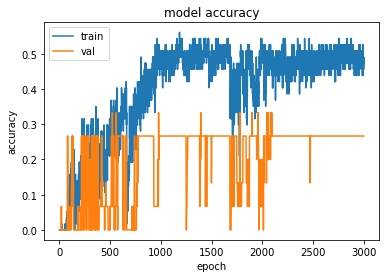

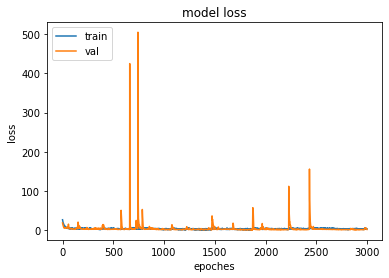

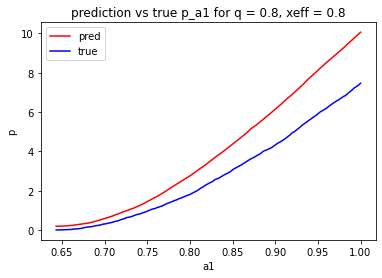

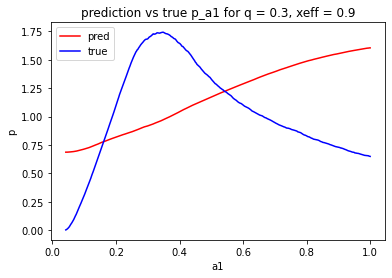

In [30]:
eva_model(model)